In [21]:
#kaggle 데이터셋 : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data
# 소스코드 


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("C:/Users/a/Downloads/Compressed/archive_2/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df.shape

(768, 9)

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='count', ylabel='Outcome'>

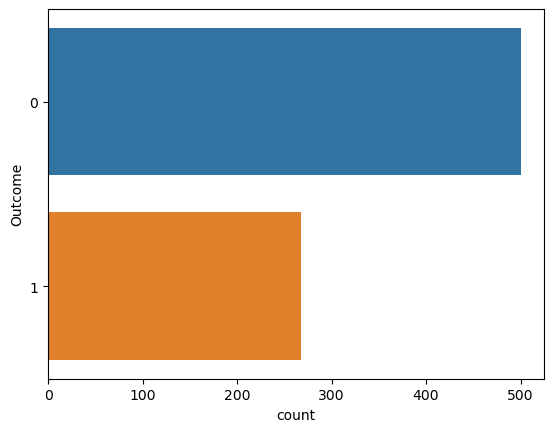

In [26]:
sns.countplot(y = df['Outcome'], data = df)

<AxesSubplot:xlabel='Age', ylabel='BMI'>

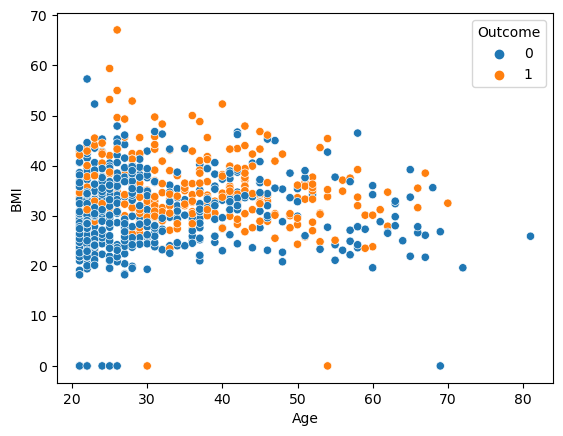

In [27]:
sns.scatterplot(x ='Age', y ='BMI', data = df , hue = 'Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

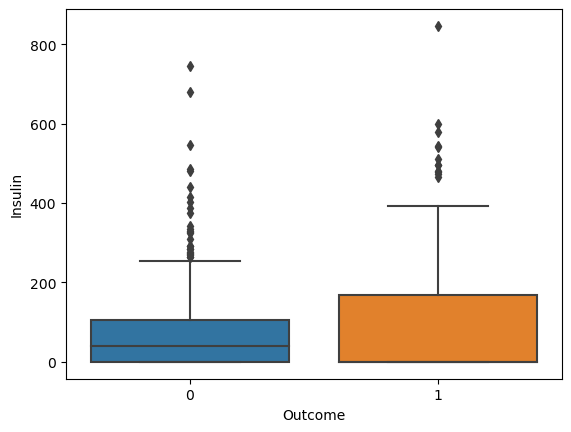

In [28]:
sns.boxplot(x = 'Outcome',y ='Insulin', data = df)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

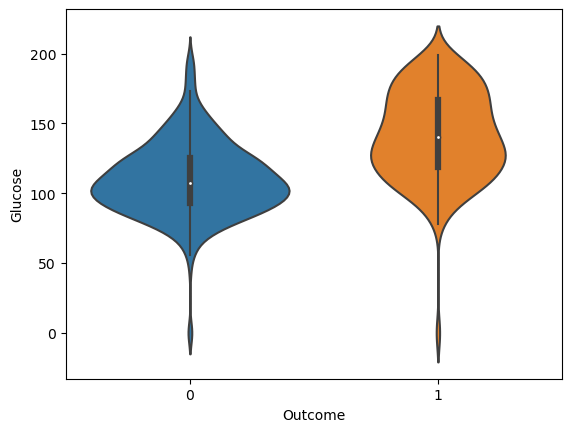

In [29]:
sns.violinplot(x = 'Outcome',y= 'Glucose', data = df)

In [30]:
df_0 = df.loc[df.Outcome == 0,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
df_1 = df.loc[df.Outcome == 1,['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

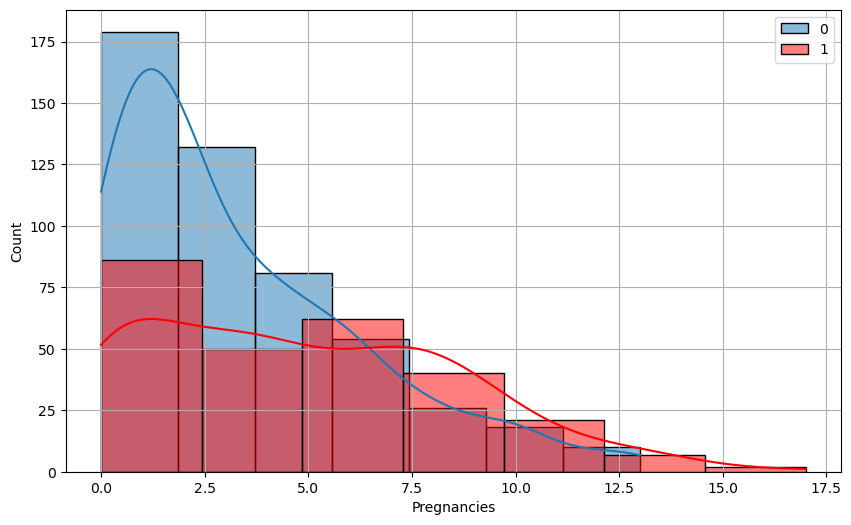

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df_0['Pregnancies'],bins=7,alpha=0.5,label='0',kde=True)
sns.histplot(df_1['Pregnancies'],bins=7,alpha=0.5,label='1',color='r',kde=True)
plt.legend()
plt.grid()
plt.show()

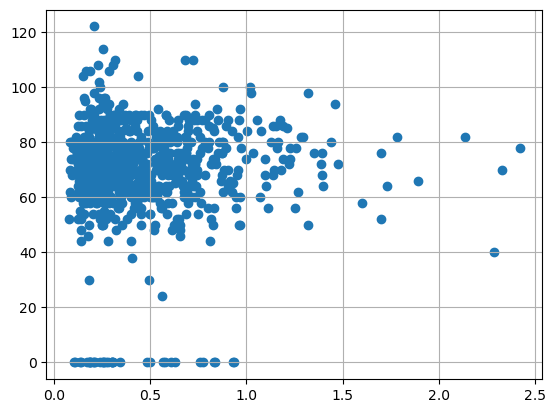

In [32]:
plt.scatter(x=df['DiabetesPedigreeFunction'], y = df['BloodPressure'])
plt.grid(True)

<AxesSubplot:>

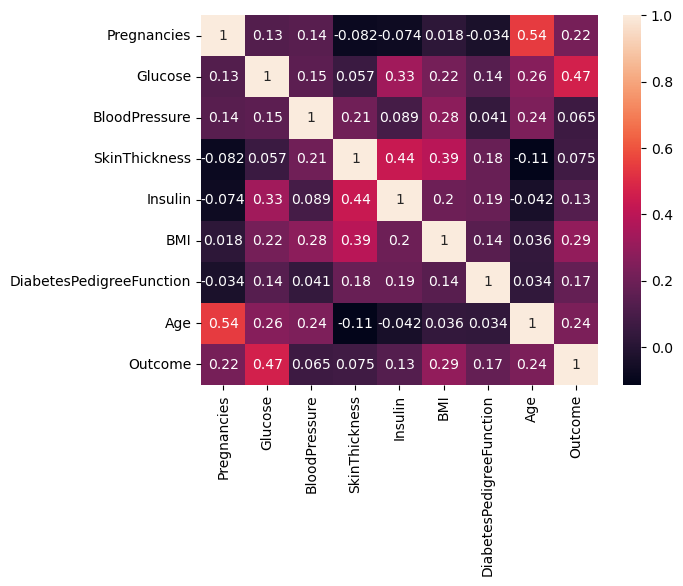

In [33]:
feature =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.heatmap(df[feature].corr(), annot=True)

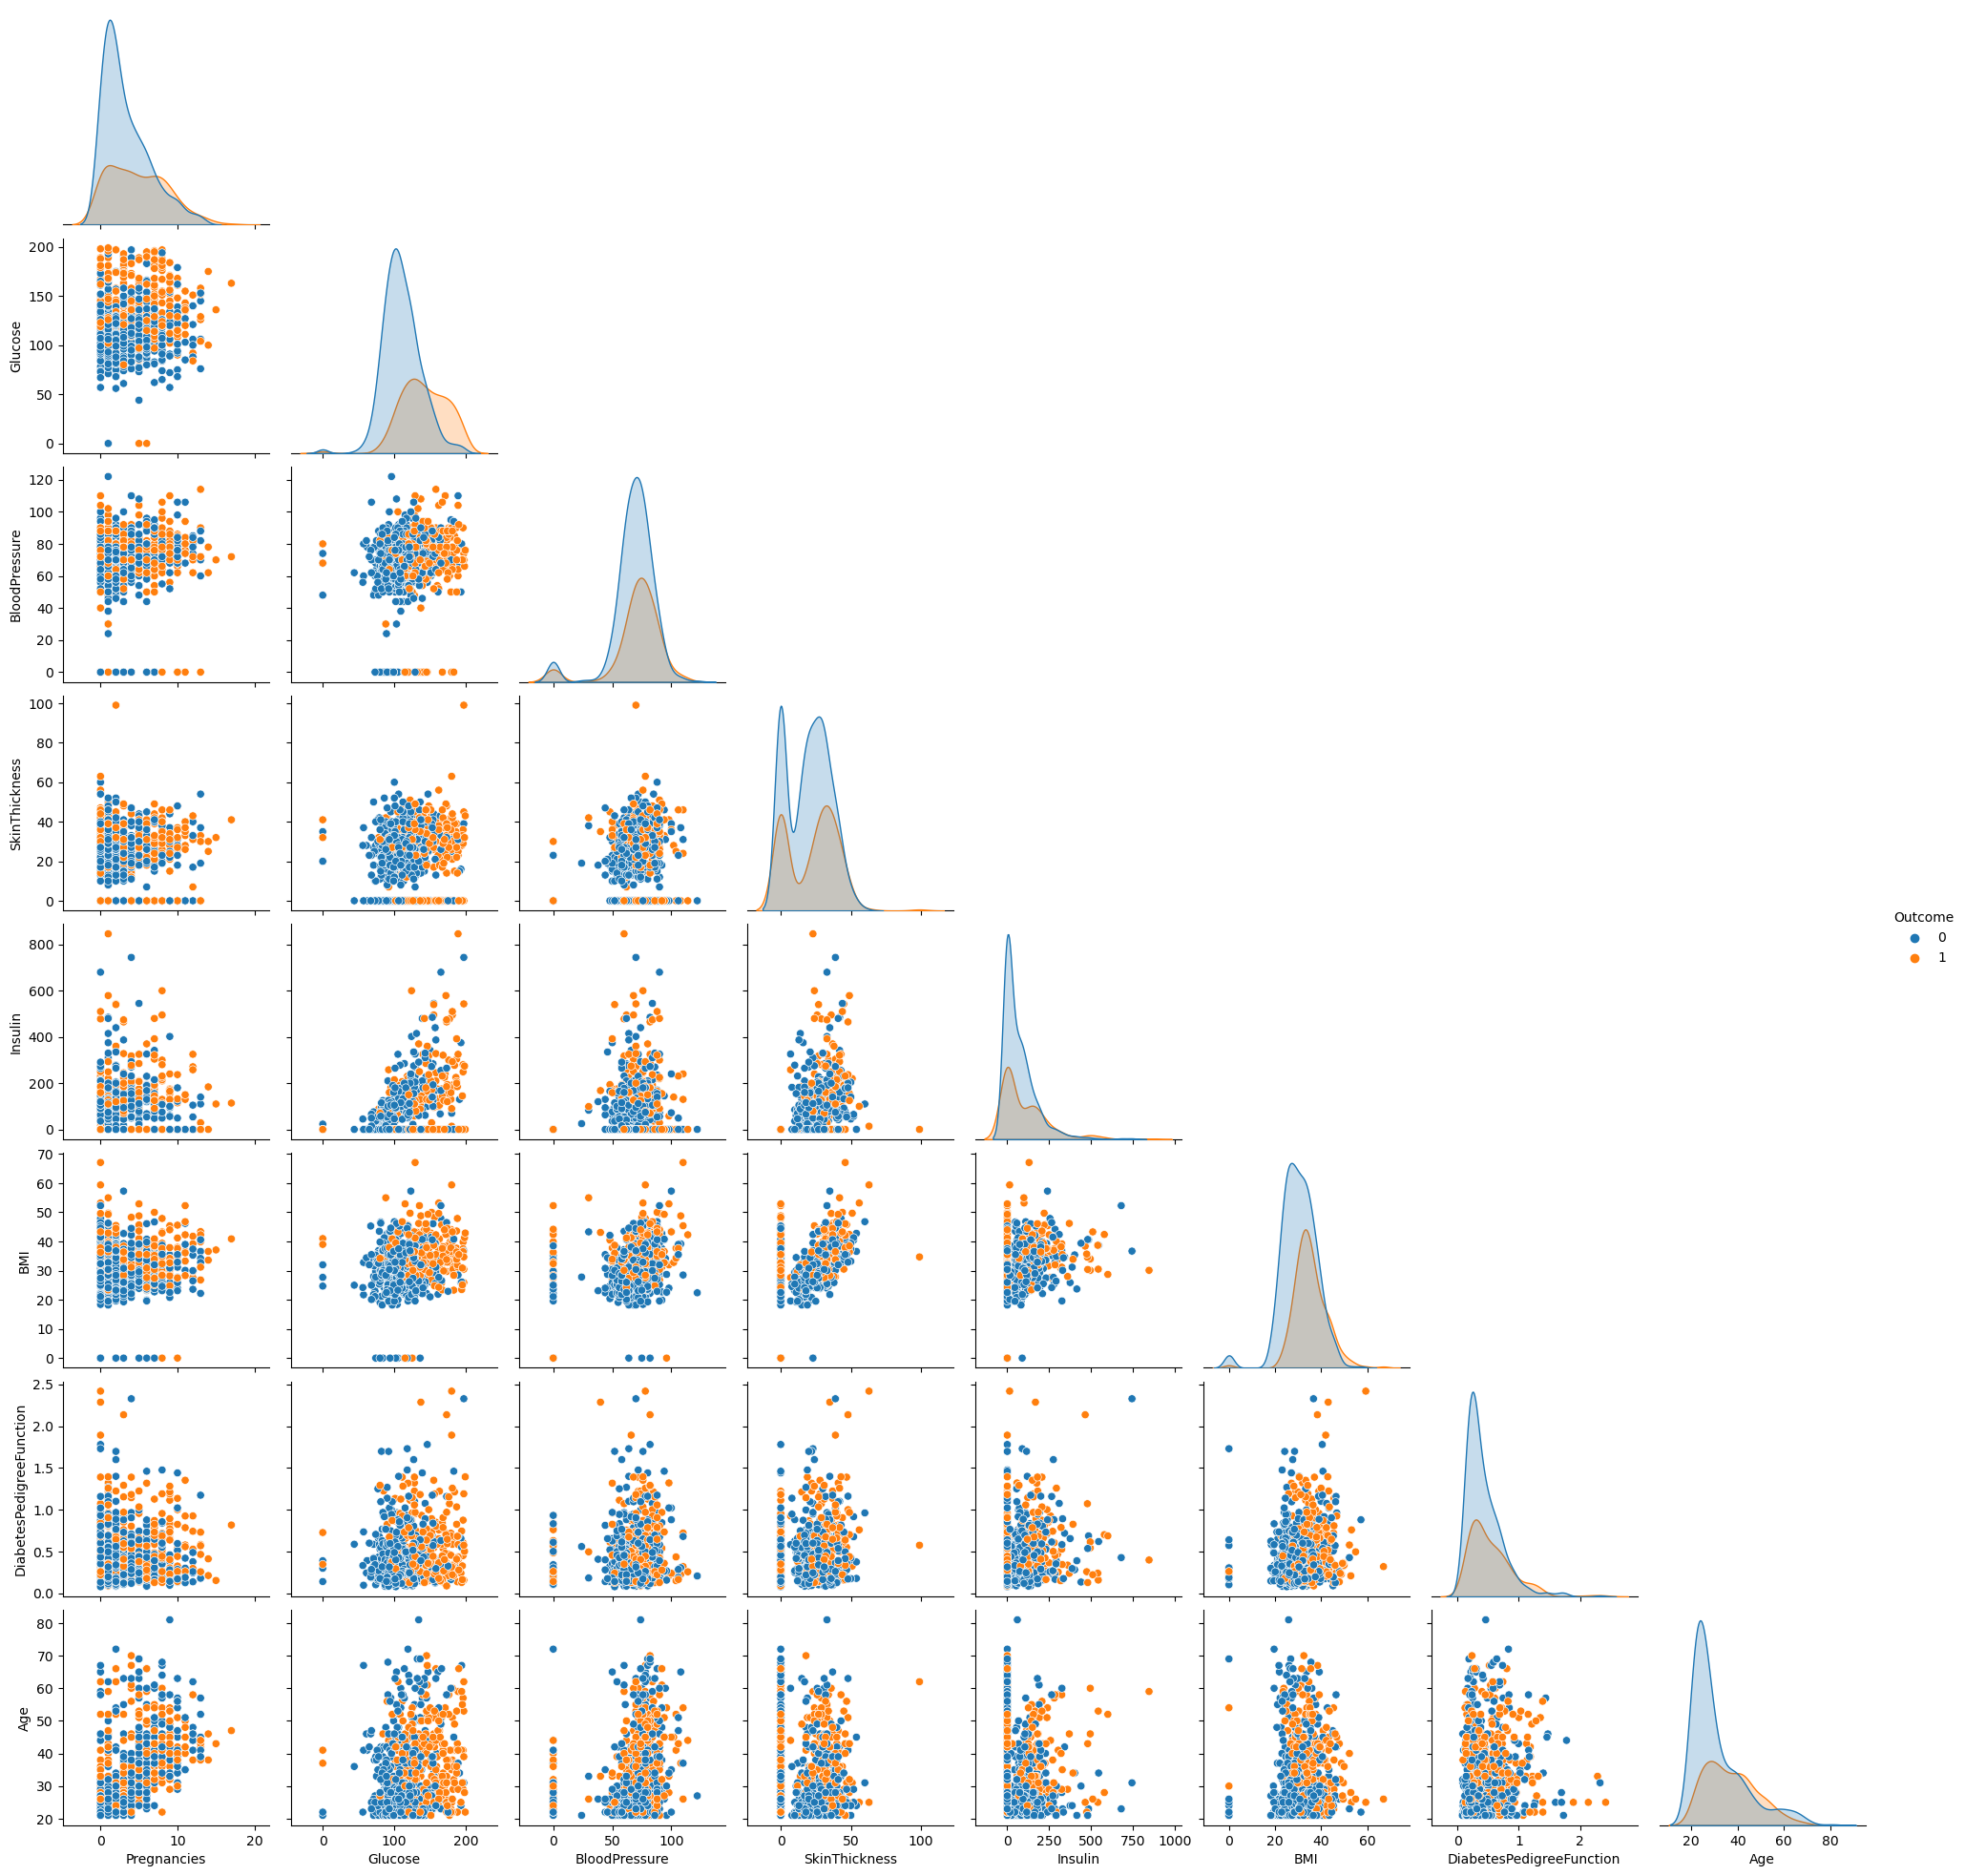

In [34]:
sns.pairplot(data = df,hue='Outcome',corner=True)

In [35]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)

print(f'중심점: {kmeans.cluster_centers_}')
#print(kmeans.n_iter_)
print(f'응집도: {kmeans.inertia_}')

중심점: [[  3.88391376 115.26699834  68.09784411  17.6185738   32.21227197
   31.17363184   0.43757048  33.11442786]
 [  3.7030303  141.46060606  72.78787879  31.2        253.70909091
   34.98545455   0.59724848  33.7030303 ]]
응집도: 5142376.455984381


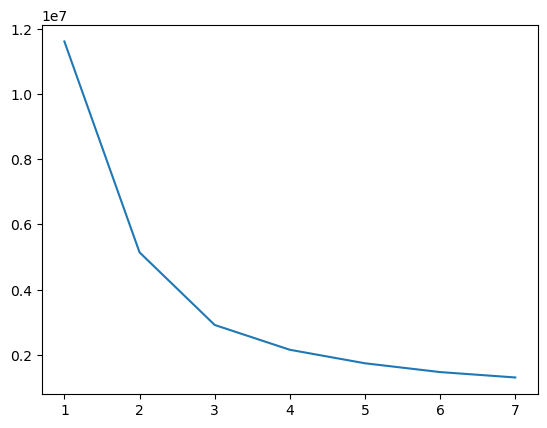

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

temp = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    temp.append(kmeans.inertia_)

plt.plot(range(1, 8), temp)
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 64.94%


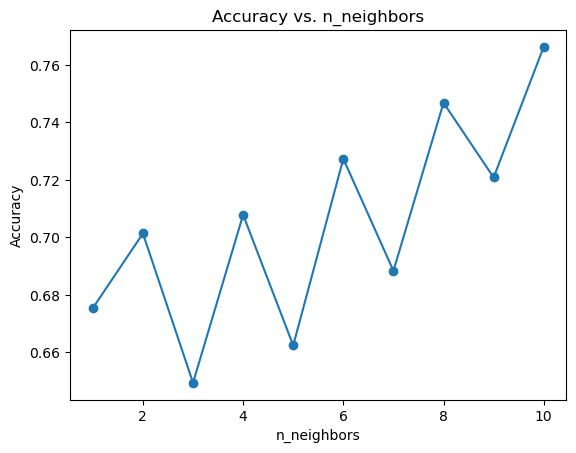

In [40]:
n_neighbors_values = list(range(1, 11))
accuracy_values = []

for n_neighbors in n_neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(n_neighbors_values, accuracy_values, marker='o')
plt.title('Accuracy vs. n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7467532467532467
[[78 21]
 [18 37]]


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7662337662337663
[[87 12]
 [24 31]]


In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7467532467532467
[[76 23]
 [16 39]]


In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print ("\n--- Random Forest ---")
print(accuracy_score(y_test,pred_rf))
print (confusion_matrix(y_test, pred_rf))


--- Random Forest ---
0.7662337662337663
[[81 18]
 [18 37]]
